In [234]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [235]:
img = cv.imread("images/11_Color.png")
width = 10.

In [236]:
img = cv.resize(img, (1920, 1080))

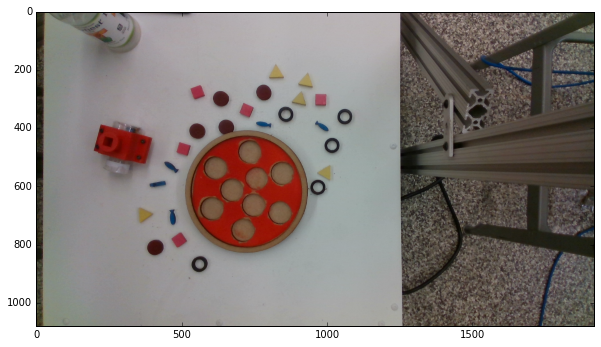

In [237]:
def showimg(image, cmap="gray"):
    plt.figure(figsize=(width, width*img.shape[0]/img.shape[1]))
    RGB_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(RGB_img, cmap=cmap, aspect='auto')
    plt.show()
showimg(img)

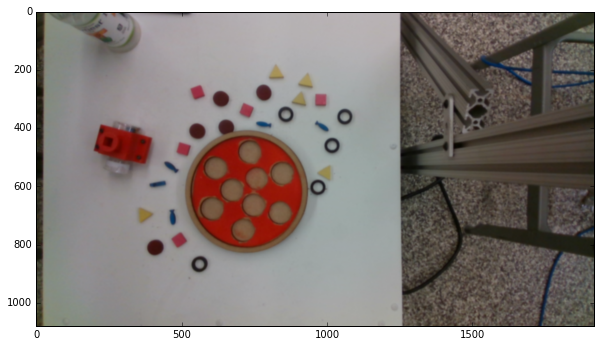

In [238]:
blur = cv.GaussianBlur(img, (11,11), 0)
showimg(blur)

In [239]:
# gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)
# showimg(gray)

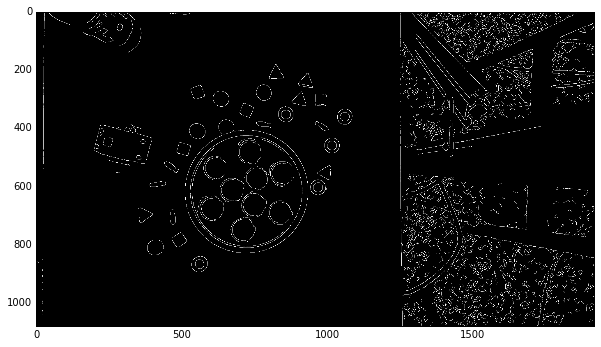

In [240]:
edges = cv.Canny(blur, 35, 70, apertureSize = 3)
showimg(edges)

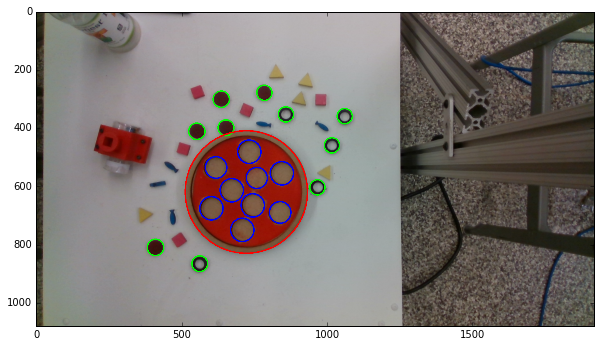

In [241]:
img_copy = np.copy(img)
circular_toppings = cv.HoughCircles(edges, cv.HOUGH_GRADIENT, 1, 25, param1=100, param2=25, minRadius=20, maxRadius=32)
if circular_toppings is not None:
    circular_toppings = np.round(circular_toppings[0, :]).astype("int")
    circular_toppings= circular_toppings.tolist()
    for (x, y, r) in circular_toppings:
        cv.circle(img_copy, (x, y), r, (0, 255, 0), 4)
        
pizza_inners = cv.HoughCircles(edges, cv.HOUGH_GRADIENT, 1, 25, param1=100, param2=25, minRadius=32, maxRadius=43)
if pizza_inners is not None:
    pizza_inners = np.round(pizza_inners[0, :]).astype("int")
    for (x, y, r) in pizza_inners:
        cv.circle(img_copy, (x, y), r, (255, 0, 0), 4)
        
pizza_outers = cv.HoughCircles(edges, cv.HOUGH_GRADIENT, 1, 25, param1=100, param2=25, minRadius=200, maxRadius=215)
if pizza_outers is not None:
    pizza_outers = np.round(pizza_outers[0, :]).astype("int")
    for (x, y, r) in pizza_outers:
        cv.circle(img_copy, (x, y), r, (0, 0, 255), 4)

showimg(img_copy)